Subiectul 1

In [8]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow", 
    "purple", "orange", "pink", "cyan", 
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv',header = None)
grid_culori = df.to_numpy

# Generarea secvenței de culori observate
observatii = ["red","red","lime","yellow","blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    for v in vecini_valizi:
        transition_probability[idx,v]=0.25
    transition_probability[idx, idx] = 0.2


# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for idx in range(numar_stari):
    emission_probability[idx, :] = 1 / len(culori)
  
# Modelul HMM
model = hmm.CategoricalHMM(n_components=stari_ascunse)
model.transmat_ = transition_probability
model.emissionprob_= emission_probability


# Rulăm algoritmul Viterbi pentru secvența de observații
logprob, secventa_stari = model.decode(observatii_idx, algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

NameError: name 'idx' is not defined

Subiectul 3

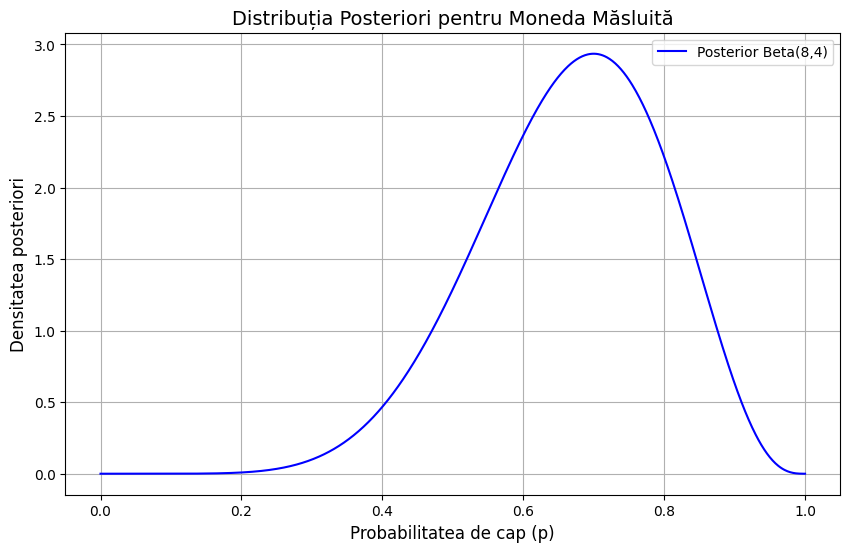

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha = 8  # 1 + 7 stema
beta_param = 4  # 1 + 3 ban

p_values = np.linspace(0, 1, 1000)

posterior = beta.pdf(p_values, alpha, beta_param)

plt.figure(figsize=(10, 6))
plt.plot(p_values, posterior, label=f'Posterior Beta({alpha},{beta_param})', color='blue')
plt.xlabel('Probabilitatea de stema (s)', fontsize=12)
plt.ylabel('Densitatea posteriori', fontsize=12)
plt.title('Distribuția Posteriori pentru Moneda Măsluită', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


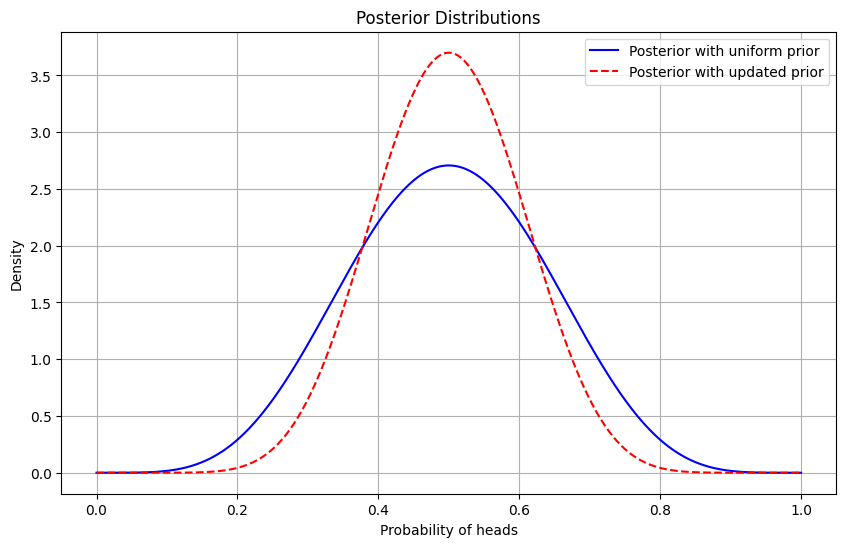

In [7]:
def posterior_params(data, prior_alpha, prior_beta):
    heads = data.count('s')
    tails = data.count('b')
    alpha_post = prior_alpha + heads
    beta_post = prior_beta + tails
    return alpha_post, beta_post

data_2 = ['b', 'b', 's', 'b', 's', 's', 'b', 's', 's', 'b']

prior_alpha_1 = 1
prior_beta_1 = 1
alpha_post_1, beta_post_1 = posterior_params(data_2, prior_alpha_1, prior_beta_1)

x = np.linspace(0, 1, 1000)
posterior_1 = beta.pdf(x, alpha_post_1, beta_post_1)

prior_alpha_2, prior_beta_2 = alpha_post_1, beta_post_1
alpha_post_2, beta_post_2 = posterior_params(data_2, prior_alpha_2, prior_beta_2)
posterior_2 = beta.pdf(x, alpha_post_2, beta_post_2)

plt.figure(figsize=(10, 6))
plt.plot(x, posterior_1, label='Posterior with uniform prior', color='blue')
plt.plot(x, posterior_2, label='Posterior with updated prior', color='red', linestyle='--')
plt.xlabel('Probability of heads')
plt.ylabel('Density')
plt.title('Posterior Distributions')
plt.legend()
plt.grid(True)
plt.show()
